<a href="https://colab.research.google.com/github/alejandromunizsiques/WorkPlace/blob/master/Reproducir_inter%C3%A9s_vs_gr%C3%A1fico_principal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Libreria

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


# Montar Volumen GoogleDrive

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/ Visualización de datos con Python/mortgages.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [4]:
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


# Filtro al 5%

In [5]:
filtro_30 = df["Mortgage Name"] == "30 Year"
filtro_5 = df["Interest Rate"] == 0.05
df_30_5 = df.loc[filtro_30 & filtro_5,:]
df_30_5 = df_30_5[["Month","Interest Paid"]]
df_30_5 = df_30_5.assign(acumulado = df_30_5["Interest Paid"].cumsum())
del df_30_5["Interest Paid"]
df_30_5.head()

,Month,acumulado
360,1,1666.66
361,2,3331.32
362,3,4993.97
363,4,6654.60
364,5,8313.20


In [6]:
meses_30_5 = df_30_5.loc[:,"Month"].values
acumulado_30_5 = df_30_5.loc[:,"acumulado"].values

# Filtro al 3%

In [7]:
filtro_3 = df["Interest Rate"] == 0.03
df_30_3 = df.loc[filtro_30 & filtro_3,:]
df_30_3 = df_30_3[["Month","Interest Paid"]]
df_30_3 = df_30_3.assign(acumulado = df_30_3["Interest Paid"].cumsum())
del df_30_3["Interest Paid"]
df_30_3.head()

,Month,acumulado
0,1,1000.00
1,2,1998.28
2,3,2994.84
3,4,3989.67
4,5,4982.77


In [8]:
meses_30_3 = df_30_3.loc[:,"Month"].values
acumulado_30_3 = df_30_3.loc[:,"acumulado"].values

# Grafico


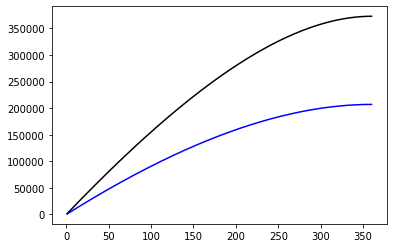

In [11]:
plt.plot(meses_30_5,acumulado_30_5 , c = 'k')
plt.plot(meses_30_3,acumulado_30_3, c = 'b'	)